In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
X_train = pickle.load(open('../Data/X_train.pkl', 'rb'))
X_test = pickle.load(open('../Data/X_test.pkl', 'rb'))
y_train = pickle.load(open('../Data/y_train.pkl', 'rb'))
y_test = pickle.load(open('../Data/y_test.pkl', 'rb'))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 20530)
(83, 20530)
(329,)
(83,)


Note : Random Forest does not require feature scaling

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

gs = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=1)   # cv=3 means 3-fold cross validation
gs.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [12]:
print("Best parameters: ", gs.best_params_)
print("Best Training score: ", gs.best_score_)
print("Test score: ", gs.score(X_test, y_test))

Best parameters:  {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Training score:  0.9331943286071726
Test score:  0.9036144578313253


In [14]:
best_model = gs.best_estimator_
best_model

RandomForestClassifier(min_samples_leaf=5, n_estimators=200, random_state=42)

In [16]:
gs.cv_results_

{'mean_fit_time': array([1.44958607, 2.66271671, 3.82777643, 1.40395641, 2.78041617,
        4.64379994, 1.53958575, 4.39000392, 6.45476   , 2.16323821,
        4.39037784, 6.32907947, 2.1623617 , 4.13018902, 6.57875617,
        2.15174643, 4.45707337, 6.0794421 , 2.10345848, 3.95163671,
        5.51688687, 1.88789264, 3.84270835, 5.54691108, 1.91757242,
        3.94728955, 5.49408205, 1.82742945, 3.75902907, 5.32994103,
        1.93238974, 3.72512523, 5.4585406 , 1.83243068, 3.34508173,
        5.37945445, 1.93148923, 3.63020515, 5.30493863, 1.84371519,
        3.69521387, 5.1910727 , 1.93797954, 3.4964296 , 5.50555285,
        1.80400983, 3.88959654, 4.81430284, 1.92389528, 3.60401773,
        5.09957504, 1.796158  , 3.75966056, 4.90339947, 2.25154932,
        4.54246012, 6.52889832, 2.24079911, 4.49992434, 6.58561206,
        2.28927724, 4.77470835, 6.59357524, 2.16528924, 4.55881667,
        5.83914797, 2.46863182, 4.54745928, 6.73926417, 2.33540185,
        3.72819964, 6.40494084,

In [18]:
from sklearn.metrics import accuracy_score

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.9036144578313253


In [19]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)
print("AUC Score:", auc_score)

AUC Score: 0.7975746268656716


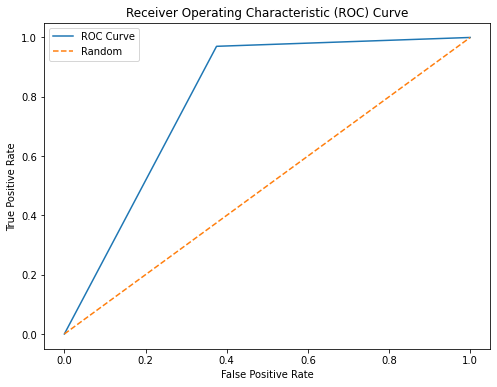

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[10,  6],
       [ 2, 65]], dtype=int64)

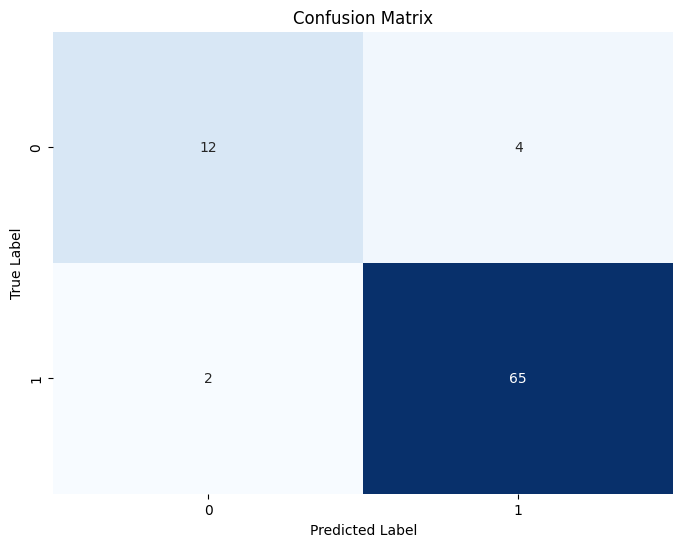

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plot confusion matrix
# cm = np.array([[10, 6], [2, 65]])
cm = np.array([[12, 4], [2, 65]])
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
dict = {
    'Model': gs.best_estimator_,
    'Best Parameters': gs.best_params_,
    'Training Set Accuracy': gs.best_score_,
    'Test Set Accuracy': test_accuracy,
    'AUC Score': auc_score
}

# save the dictionary to a pickle file
import pickle

with open('rf_all_dim.pkl', 'wb') as f:
    pickle.dump(dict, f)

In [23]:
import pickle

dct = pickle.load(open('rf_all_dim.pkl', 'rb'))
dct

{'Model': RandomForestClassifier(min_samples_leaf=5, n_estimators=200, random_state=42),
 'Best Parameters': {'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Training Set Accuracy': 0.9331943286071726,
 'Test Set Accuracy': 0.9036144578313253,
 'AUC Score': 0.7975746268656716}